## EDA - Project (Instacart)

## Introduction
In this project, I will work with data from Instacart; a delivery platform with a similar system to Uber Eats and Door dash, but for groceries. This project is aimed to test as well as apply all the knowledge and skills I've learned in this chapter. I'll need to work through the provided dataset and accomplish the tasks given.

### Stages
As per the usual, this project consists of 3 stages:
   1. Data overview
   2. Data preproccessing
   3. Data analysis
   
First, I will evaluate the quality of the data and see if there are any issues with it, such as duplicates, missing values, and/or unfitting data types. Then I'll try to address these issues and see if some of the 'inappropriate' data/values are worth keeping or better off dropped. Lastly, once the data is in good condition, I will perform the analysis required.

## First step - Data overview

In [1]:
# importing necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# assigning all the files to their variables, with corresponding arguments for readability
ic_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';') 
ic_orders.head()
print()
ic_orders.info()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


The ic_orders dataframe contains the general idea of when the product is being ordered, as well as the duration in between orders. There seems to have some missing values on the days since prior order column, but overall it looks pretty clean.

In [3]:
products = pd.read_csv('/datasets/products.csv', sep=';')
products.head()
products.info()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


The products dataframe contains the name of items for the products, as well as corresponding IDs and their locations. There seems to be some missing values on the product names column though.

In [4]:
ord_products = pd.read_csv('/datasets/order_products.csv', sep=';')
ord_products.head()
ord_products.info(show_counts=True)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


The product order dataframe contains both order ID and product ID which can be used as a bridge to connect the previously viewed dataframes. This dataframe contains a lot of entries, up to 4.5 million. There seems to be some missing values in the add to cart order column.

In [5]:
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
aisles.head()
aisles.info()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


This dataframe is relatively small, containing the aisle IDs and their names, which corresponds to the previously viewed products dataframe. The dataframe itself looks pretty clean at first glance, with no missing values.

In [6]:
departments = pd.read_csv('/datasets/departments.csv', sep=';')
departments.head()
departments.info()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


This dataframe is the smallest of them all, with only having 21 entries. It contains the department ID and the corresponding names, which matches the ones on the products dataframe. This dataframe itself also looks very clean, with no missing values.

## Find and remove duplicate values

### `orders` data frame

In [7]:
# Check for duplicated orders


ic_orders.info(show_counts=True) # pulling general info of the data
ic_orders.duplicated().sum() # number of duplicated rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


15

In [8]:
ic_orders.head(10) # Pulling the first 10 rows for a view of the data

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


As we can see, there are a total of 15 duplicated rows, and some missing values in the 'days_since_prior_order' column.

In [9]:
ic_orders = ic_orders.rename(columns={'days_since_prior_order': 'days_spo',
                                     'order_hour_of_day': 'order_hod'})
# The name of the columns are too long so I shortened it for ease of access

In [10]:
ic_orders['order_dow'].unique()


array([6, 5, 0, 4, 3, 1, 2])

Since there's no indicator on what day the number 0 is, I am going to assume that it is a Sunday for now.

In [11]:
# Check for all orders placed Wednesday at 2:00 AM
ic_orders[(ic_orders['order_dow'] == 3) & (ic_orders['order_hod'] == 2)]

,order_id,user_id,order_number,order_dow,order_hod,days_spo
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


There are 121 orders on Wednesdays at 2:00 AM.

[UPDATED](#proof) : <a id='updated'></a>

I changed my assumption down below after looking at the graph. Here's the new data for orders placed Wednesday at 2:00 AM

In [12]:
ic_orders[(ic_orders['order_dow'] == 4) & (ic_orders['order_hod'] == 2)]

,order_id,user_id,order_number,order_dow,order_hod,days_spo
2124,401544,80955,72,4,2,2.0
14847,1913472,138992,16,4,2,6.0
16116,2796392,154904,12,4,2,13.0
16471,2209130,72786,5,4,2,30.0
32120,2235095,89980,18,4,2,7.0
...,...,...,...,...,...,...
467118,3210362,51765,22,4,2,5.0
470642,2205284,121327,33,4,2,2.0
472604,2101463,60877,6,4,2,30.0
477497,776659,111694,9,4,2,15.0


*NEW* : There are 114 orders on Wednesdays at 2:00 AM.

In [13]:
# Remove duplicate orders
ic_orders = ic_orders.drop_duplicates()
# Removing all the explicit duplicates which has the same values on
# all the columns

In [14]:
# Double check for duplicate rows
ic_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      478952 non-null  int64  
 1   user_id       478952 non-null  int64  
 2   order_number  478952 non-null  int64  
 3   order_dow     478952 non-null  int64  
 4   order_hod     478952 non-null  int64  
 5   days_spo      450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


As we can see, the number of index decreases as we drop the explicit duplicates.

In [15]:
# Double check for duplicate order IDs only
ic_orders.duplicated(subset=['order_id']).sum()

0

All the order ID's are unique.

The 'orders' dataframe seems to contain a few duplicated values, but I have removed the explicit ones for now. There also seems to be some missing values but I'll get to that later.

### `products` data frame <a id='products'></a>

In [16]:
# Overview of the data
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


We have missing values in the 'product_name' column.

In [17]:
products.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [18]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [19]:
# Check for just duplicate product IDs
products.duplicated(subset=['product_id']).sum()

0

In [20]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'].duplicated().sum()


1257

In [21]:
products['product_name'].str.lower().duplicated().sum()

1361

We have duplicate values in the 'product_name' columns.

In [22]:
# Check for duplicate product names that aren't missing
products[~products['product_name'].isna()]['product_name'].str.lower().duplicated().sum()

104

We have 104 duplicate product names that aren't NaN(missing). This equals to the difference between the duplicated product names that were lowercased and not.

In [23]:
products[(~products['product_name'].isna()) & products['product_name'].str.lower().duplicated()]

,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [24]:
duplicated_names = ['high performance energy drink', 'original pancake & waffle mix', 'biotin 1000 mcg']
products[products['product_name'].str.lower().isin(duplicated_names)]

,product_id,product_name,aisle_id,department_id
41,42,Biotin 1000 mcg,47,11
2058,2059,Biotin 1000 Mcg,47,11
22540,22541,High Performance Energy Drink,64,7
25892,25893,Original Pancake & Waffle Mix,130,14
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14


These duplicates don't seem to have a huge impact on the whole analysis, so I am going to keep them for now.

Overall, the products table is pretty clean, with the exception of the missing values.

### `departments` data frame 

<a id='departments'></a>


In [25]:
# Checking the overall info of the dataframe
departments.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [26]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [27]:
departments['department'].isna()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
Name: department, dtype: bool

The departments table looks pretty good.

### `aisles` data frame 

<a id='aisles'></a>

In [28]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


There doesn't seem to be any missing values in the aisles table.

In [29]:
aisles.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [30]:
aisles.duplicated().sum()

0

No duplicates in the aisles table.

### `order_products` data frame

In [31]:
# Looking up overall info of the table
ord_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


There are missing values in the 'add_to_cart' column.

In [32]:
ord_products.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


In [33]:
# Check for fullly duplicate rows
ord_products.duplicated().sum()

0

In [34]:
# Double check for any other tricky duplicates
ord_products['order_id'].duplicated().sum()
ord_products[ord_products['order_id'].duplicated(keep=False)].tail(10)

4094961

,order_id,product_id,add_to_cart_order,reordered
4544997,2300092,10017,1.0,0
4544998,1910401,31915,10.0,1
4544999,1622300,24852,1.0,1
4545000,1125324,40600,6.0,1
4545001,2179020,10902,23.0,0
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1
4545006,1398151,28733,9.0,0


There seems to be duplicates on the supposedly unique 'order_id' column.

In [35]:
ord_products[ord_products['order_id'] == 577211]
# Taking a sample of one of the duplicated value in the order ID column

,order_id,product_id,add_to_cart_order,reordered
390390,577211,2295,13.0,1
428269,577211,21938,14.0,0
536731,577211,5212,4.0,0
930372,577211,44422,17.0,0
1140207,577211,17795,15.0,1
2297280,577211,35425,6.0,0
2904374,577211,36029,9.0,0
2973427,577211,38360,11.0,0
3052752,577211,45311,18.0,0
3096952,577211,42342,7.0,0


In [36]:
ord_products[ord_products['order_id'] == 577211].sort_values(by=['add_to_cart_order'])

,order_id,product_id,add_to_cart_order,reordered
3857584,577211,24852,1.0,1
4219276,577211,27307,2.0,1
3487864,577211,47759,3.0,1
536731,577211,5212,4.0,0
3365648,577211,35494,5.0,0
2297280,577211,35425,6.0,0
3096952,577211,42342,7.0,0
4056543,577211,41625,8.0,0
2904374,577211,36029,9.0,0
3371449,577211,40560,10.0,0


In [37]:
ord_products[ord_products['order_id'] == 319435].sort_values(by=['add_to_cart_order'])
# Sampling another value for double checking

,order_id,product_id,add_to_cart_order,reordered
913135,319435,29989,1.0,0
2922383,319435,30358,2.0,0
1579720,319435,12674,3.0,0
2642237,319435,37208,4.0,0
2696180,319435,24852,5.0,1
2930946,319435,16136,6.0,1
2368587,319435,11712,7.0,1
4545005,319435,691,8.0,1
2153854,319435,22372,9.0,1
2590633,319435,46802,10.0,0


It turns out that the order ID stays the same for subsequent items put into the cart, and the add to cart order keeps its consistency by not having duplicates on each order IDs.

In [38]:
# Sampling order IDs and product IDs to check for uniqueness
ord_products[(ord_products['order_id'] == 2300092) & (ord_products['product_id'] == 10017)]
ord_products[(ord_products['order_id'] == 692640) & (ord_products['product_id'] == 47766)]

,order_id,product_id,add_to_cart_order,reordered
4544997,2300092,10017,1.0,0


,order_id,product_id,add_to_cart_order,reordered
4545004,692640,47766,4.0,1


The sampled order IDs also have unique product IDs which don't have duplicates. This proves that no one item overlaps with each other for each order ID. For these reasons I have decided to keep the duplicates

## Find and remove missing values


### `products` data frame

In [39]:
# Pulling up the info again
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [40]:
# Are all of the missing product names associated with aisle ID 100?


#Testing this hypothesis
products['product_name'].isna().sum()

1258

There are 1258 missing values for product names. Let's crosscheck with an added filtering mask.

In [41]:
products[(products['product_name'].isna()) & (products['aisle_id'] == 100)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Confirmed. All the missing product names are indeed associated with aisle ID 100.

In [42]:
# Are all of the missing product names associated with department ID 21?

# Crosschecking with the previous value
products[(products['product_name'].isna()) & (products['department_id'] == 21)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


This is also confirmed. It seems there's a correlation between the [aisle IDs](#aisles), [department IDs](#departments), and the missing values in the product names.

In [43]:
# What is this aisle and department?
aisles[aisles['aisle_id'] == 100]

,aisle_id,aisle
99,100,missing


In [44]:
departments[departments['department_id'] == 21]

,department_id,department
20,21,missing


It looks like both aisle ID 100 and department id 21 are missing its values.

In [45]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna(value='Unknown')

products[products['aisle_id'] == 100]

,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21
71,72,Unknown,100,21
109,110,Unknown,100,21
296,297,Unknown,100,21
416,417,Unknown,100,21
...,...,...,...,...
49552,49553,Unknown,100,21
49574,49575,Unknown,100,21
49640,49641,Unknown,100,21
49663,49664,Unknown,100,21


Changed all the missing values in products table's 'product_name' column to 'Unknown', as their corresponding aisle and department ID are missing, or simply doesn't exist.

### `orders` data frame

In [46]:
ic_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      478952 non-null  int64  
 1   user_id       478952 non-null  int64  
 2   order_number  478952 non-null  int64  
 3   order_dow     478952 non-null  int64  
 4   order_hod     478952 non-null  int64  
 5   days_spo      450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [47]:
# Are there any missing values where it's not a customer's first order?

# Testing the hypothesis
ic_orders[ic_orders['order_number'] != 1].isna().sum()

order_id        0
user_id         0
order_number    0
order_dow       0
order_hod       0
days_spo        0
dtype: int64

In [48]:
ic_orders[ic_orders['order_number'] == 1]

,order_id,user_id,order_number,order_dow,order_hod,days_spo
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [49]:
ic_orders.isna().sum()

order_id            0
user_id             0
order_number        0
order_dow           0
order_hod           0
days_spo        28817
dtype: int64

There are 28817 rows where there are missing values in the days since prior order column. And since the missing values are associated with first time orders, the assumption is that the values are missing because the costumers has no prior orders before this one.

There are a total of 478952 indexes. There are only 450135 non-null values in the days since prior order column. 

478952 - 450135 = 28817

It checks out. The missing values are due to no prior purchases from the customers. I am going to change the missing values to -1 to indicate that this order is a first time order. I am also going to change the data type to integer for uniformity of the column.

In [50]:
ic_orders['days_spo'] = ic_orders['days_spo'].fillna(value=-1)
ic_orders['days_spo'] = ic_orders['days_spo'].astype('int')
ic_orders.info()
ic_orders.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   order_id      478952 non-null  int64
 1   user_id       478952 non-null  int64
 2   order_number  478952 non-null  int64
 3   order_dow     478952 non-null  int64
 4   order_hod     478952 non-null  int64
 5   days_spo      478952 non-null  int64
dtypes: int64(6)
memory usage: 25.6 MB


,order_id,user_id,order_number,order_dow,order_hod,days_spo
451425,1166978,82350,9,4,19,30
163210,1807900,104074,20,4,13,3
363085,969550,138445,26,5,8,4
405939,2417026,185813,17,4,12,21
275816,280515,182506,1,4,20,-1
19081,1227253,76924,9,1,11,5
10051,1051277,71834,75,3,14,2
247041,1028439,74781,3,4,10,30
198225,1212366,125709,25,0,16,7
342499,1391266,121840,40,0,17,9


Now the orders table looks clean.

### `order_products` data frame

In [51]:
ord_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [52]:
# As previously tested, there are missing values in the add to cart 
# order column so I'm going to pull out the rows with missing values

ord_products[ord_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


There are 836 rows with missing values in the add to cart order column.
My first guess is that these orders are instant checkouts or 'buy now' ones instead of piling them up in the cart first.

In [53]:
ord_products[ord_products['add_to_cart_order'].isna()].head(10)

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
34183,844733,32717,NaN,0
57981,61355,5322,NaN,0
58228,936852,31373,NaN,1
62655,264710,40281,NaN,0
64336,1717990,39408,NaN,0


In [54]:
products[products['product_id'].isin([5068, 43867, 11688, 4142, 42828])]

,product_id,product_name,aisle_id,department_id
4141,4142,Trilogy Kombucha,31,7
5067,5068,Cauliflower Florets,32,4
11687,11688,Lemon Fruit & Nut Food Bar,3,19
42827,42828,Whipped Cream Cheese,108,16
43866,43867,100% Grated Parmesan Cheese,21,16


I don't see a correlation between the products sold and whether or not the products themselves are grounds for instant checkouts.

In [55]:
ord_products[ord_products['order_id'] == 2449164].sort_values(by=['add_to_cart_order']).tail(20)

,order_id,product_id,add_to_cart_order,reordered
3099755,2449164,14852,57.0,1
3151147,2449164,41999,58.0,1
1032507,2449164,33043,59.0,1
869971,2449164,21607,60.0,1
2877850,2449164,30599,61.0,1
2927242,2449164,6317,62.0,0
2369520,2449164,2450,63.0,0
508706,2449164,22935,64.0,0
737,2449164,5068,NaN,0
128360,2449164,14386,NaN,0


The add to cart order seems to have stopped at 64. This might be the cause of the missing values.

In [56]:
ord_products[ord_products['order_id'] == 1717990].sort_values(by=['add_to_cart_order']).tail(30)

,order_id,product_id,add_to_cart_order,reordered
3910310,1717990,1488,57.0,0
4239413,1717990,11270,58.0,1
225930,1717990,2179,59.0,0
3354175,1717990,45926,60.0,1
676507,1717990,8277,61.0,1
935077,1717990,28204,62.0,1
188356,1717990,19057,63.0,1
1095992,1717990,6740,64.0,1
16418,1717990,4142,NaN,0
64336,1717990,39408,NaN,0


This order ID with missing values also seem to stop at 64.

In [57]:
# What are the min and max values in this column?

# Pulling the min and max values of each column
ord_products.max()

order_id             3421079.0
product_id             49694.0
add_to_cart_order         64.0
reordered                  1.0
dtype: float64

In [58]:
ord_products.min()

order_id             4.0
product_id           1.0
add_to_cart_order    1.0
reordered            0.0
dtype: float64

The add to cart order column seems to only go up to 64.

In [59]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

atco_na = ord_products[ord_products['add_to_cart_order'].isna()]['order_id']
atco_na.count()
atco_na_id = atco_na.to_numpy()

836

In [60]:
# Do all orders with missing values have more than 64 products?
missing_atco = ord_products[ord_products['order_id'].isin(atco_na_id)].groupby('order_id').count()
missing_atco

,product_id,add_to_cart_order,reordered
order_id,,,
9310,65,64,65
61355,127,64,127
102236,95,64,95
129627,69,64,69
165801,70,64,70
...,...,...,...
2999801,70,64,70
3125735,86,64,86
3308010,115,64,115


There are 70 IDs with missing values. Let's add a filtering mask for orders above 64 to see if the numbers are still the same.

In [61]:
missing_atco[missing_atco['product_id'] > 64]

,product_id,add_to_cart_order,reordered
order_id,,,
9310,65,64,65
61355,127,64,127
102236,95,64,95
129627,69,64,69
165801,70,64,70
...,...,...,...
2999801,70,64,70
3125735,86,64,86
3308010,115,64,115


The numbers are the same, which means the actual cause of there being missing values is due to the add to cart order column not being able to store numbers above 64.

In [62]:
# Replace missing values with 999 and convert column to integer type
ord_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [63]:
ord_products['add_to_cart_order'] = ord_products['add_to_cart_order'].fillna(value=999)
ord_products.max()

order_id             3421079.0
product_id             49694.0
add_to_cart_order        999.0
reordered                  1.0
dtype: float64

In [64]:
ord_products['add_to_cart_order'] = ord_products['add_to_cart_order'].astype('int')
ord_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Missing values has been replaced to 999 and data type has been changed to integer.

# Analysis Questions

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [65]:
ic_orders[['order_hod', 'order_dow']].max()

order_hod    23
order_dow     6
dtype: int64

In [66]:
ic_orders[['order_hod', 'order_dow']].min()

order_hod    0
order_dow    0
dtype: int64

Verified. The columns order hour of day and days of week both start at 0 and the hour of day ends in 23, while days of week column ends in 6. 

### [A2] What time of day do people shop for groceries?

In [67]:
hourofday = ic_orders.groupby('order_hod').count()['order_id']
hourofday

order_hod
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_id, dtype: int64

<AxesSubplot:title={'center':'What time do people shop for groceries'}, xlabel='Time of Day', ylabel='Amount of orders/people shopping'>

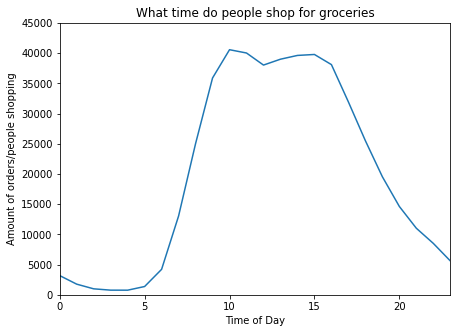

In [68]:
hourofday.plot( y='order_id',
                xlabel='Time of Day',
                ylabel='Amount of orders/people shopping',
                figsize=[7, 5],
              title='What time do people shop for groceries',
              xlim=[0, 23],
              ylim=[0, 45000],
              )
plt.show()

The number of people that shops for groceries starts to rise as early as 5 AM in the morning, and continues to increase as it peaks at 10 AM, which then hovers around the same amount until 5 PM, which would then start to dwindle until the next day at its lowest at 4 AM.

### [A3] What day of the week do people shop for groceries?

In [69]:
daysofweek = ic_orders.groupby('order_dow').count()['order_id']
daysofweek

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_id, dtype: int64

<AxesSubplot:title={'center':'Days when people shop vs How many orders'}, xlabel='Days of the week', ylabel='Amount of orders'>

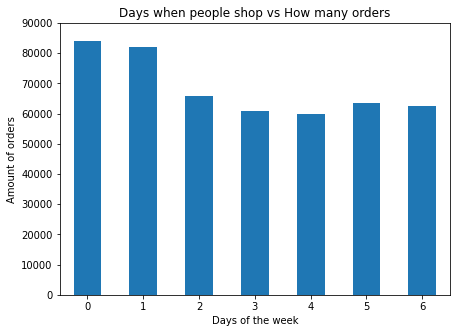

In [70]:
daysofweek.plot(y='order_id',
               xlabel='Days of the week',
               ylabel='Amount of orders',
               figsize=[7, 5],
               title='Days when people shop vs How many orders',
               xlim=[0, 6],
               ylim=[0, 90000],
               kind='bar',
               rot=0)
plt.show()


<a id='proof'></a>The day that most people shop for groceries is on day 0 and 1, which, to my previous assumption, day 0 is a Sunday. Based on this graph, I would think day 0 and 1 is actually the weekends where most people have day offs, so I am going to change my [assumption](#updated) and set 0 as a Saturday, which would then correspond to the values on this graph.

Going on with this hypothesis, the number of people shopping drops on a Monday, and continues to decrease until it reaches the lowest number on a Wednesday, and rises again as it approaches the weekend.

### [A4] How long do people wait until placing another order?

In [71]:
dspo_count = ic_orders.groupby('days_spo').count()['order_id']
dspo_count

days_spo
-1     28817
 0      9589
 1     20179
 2     27138
 3     30224
 4     31006
 5     30096
 6     33930
 7     44577
 8     25361
 9     16753
 10    13309
 11    11467
 12    10658
 13    11737
 14    13992
 15     9416
 16     6587
 17     5498
 18     4971
 19     4939
 20     5302
 21     6448
 22     4514
 23     3337
 24     3015
 25     2711
 26     2640
 27     2986
 28     3745
 29     2673
 30    51337
Name: order_id, dtype: int64

<AxesSubplot:title={'center':'Number of days people wait vs Amount of People'}, xlabel='Number of days since prior order', ylabel='Amount of people'>

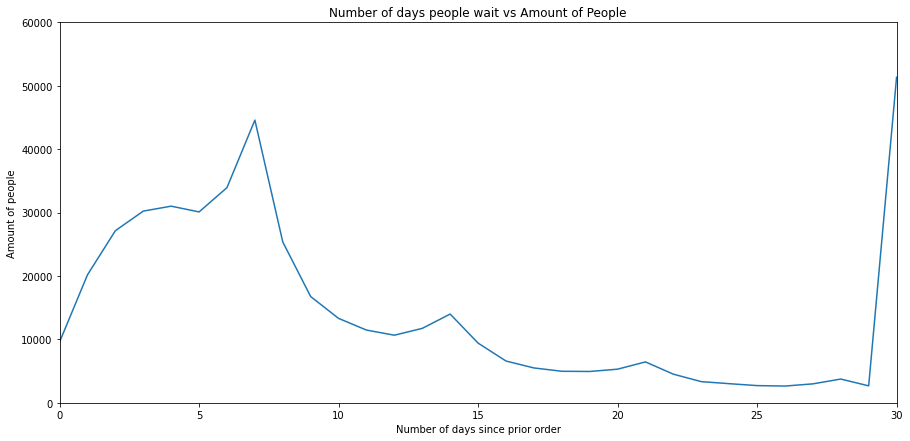

In [72]:
dspo_count.plot(y='order_id',
               xlabel='Number of days since prior order',
               ylabel='Amount of people',
               figsize=[15, 7],
               title='Number of days people wait vs Amount of People',
               xlim=[0, 30],
               ylim=[0, 60000],
               rot=0)
plt.show()

According to this graph, people mostly wait a whole month(30 days) until they place another order, followed by a week(7 days). This makes sense because most people actually buy groceries on an organized schedule, which is either monthly or weekly. After day 7, the number seems to continue to drop until day 29, a day before hitting the monthly schedule. This is probably because people tend to wait until their actual schedule to shop for groceries, and as they got closer to the specified time, their desire to shop gets lower and lower so they can go and buy everything at once on the scheduled day instead.

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [73]:
ic_wednesday = ic_orders[ic_orders['order_dow'] == 4]

In [74]:
ic_saturday = ic_orders[ic_orders['order_dow'] == 0]

<AxesSubplot:title={'center':'Wednesdays vs Saturdays'}, ylabel='Frequency'>

<AxesSubplot:title={'center':'Wednesdays vs Saturdays'}, ylabel='Frequency'>

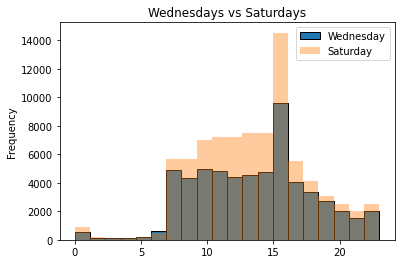

In [75]:
ic_wednesday['order_hod'].plot(kind='hist',
                              bins=20,
                              title='Wednesdays vs Saturdays',
                              xlabel='Time of day',
                              ylabel='Amount of orders', edgecolor='black')

ic_saturday['order_hod'].plot(kind='hist',
                              bins=20, alpha=0.4, xlabel='Time of day',
                              ylabel='Amount of orders')

plt.legend(['Wednesday', 'Saturday'])
plt.show()

### I don't know why the labels don't seem to show

Their distribution is very much similar to one another, rising at round 10:00 AM and peaking at around 3:00 PM.

### [B2] What's the distribution for the number of orders per customer?

In [76]:
num_of_orders = ic_orders[['order_id', 'order_number']]


<AxesSubplot:ylabel='Frequency'>

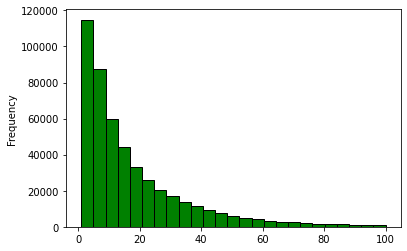

In [77]:
num_of_orders['order_number'].plot(kind='hist', bins=25, color='green', edgecolor='black')
plt.show()

There is a very high volume of casual shoppers which has only shopped for a small amount of times(below 20 times) as opposed to the amount of 'regulars' who has shopped more frequently. This shows that there's more sales made from recent customers than regulars.

### [B3] What are the top 20 popular products (display their id and name)?

In [78]:
# Grouping the table by the counts of each product
top_20 = ord_products.groupby('product_id',as_index=False
                    ).count().sort_values(by=['order_id'], ascending=False).head(20) 

In [79]:
# Merging the table with the products table to get the name of each products
top_20_merged = top_20.merge(products, on='product_id')[['product_id', 'product_name', 'order_id']]
top_20_merged = top_20_merged.rename(columns={'order_id' : 'number_of_orders'})
top_20_merged

,product_id,product_name,number_of_orders
0,24852,Banana,66050
1,13176,Bag of Organic Bananas,53297
2,21137,Organic Strawberries,37039
3,21903,Organic Baby Spinach,33971
4,47209,Organic Hass Avocado,29773
5,47766,Organic Avocado,24689
6,47626,Large Lemon,21495
7,16797,Strawberries,20018
8,26209,Limes,19690
9,27845,Organic Whole Milk,19600


Bananas sit at the top of most bought items/most popular product, taking the top 2 of most ordered items. The majority of the top 20 most bought items are fruits/vegetables.

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [80]:
# Grouping by the count of each orders
order_amount = ord_products.groupby('order_id').count()
order_amount.sort_values(by=['product_id'])


,product_id,add_to_cart_order,reordered
order_id,,,
3421079,1,1,1
1288686,1,1,1
1288764,1,1,1
1288825,1,1,1
1288873,1,1,1
...,...,...,...
1959075,98,98,98
171934,104,104,104
2136777,108,108,108


<AxesSubplot:ylabel='Frequency'>

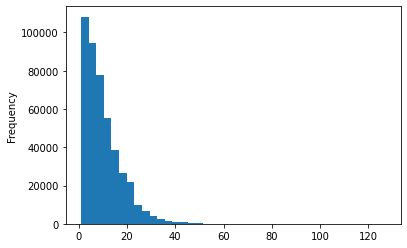

In [81]:
order_amount['product_id'].plot(kind='hist', bins=40)
plt.show()

In [82]:
order_amount.describe()

,product_id,add_to_cart_order,reordered
count,450046.000000,450046.000000,450046.000000
mean,10.098983,10.098983,10.098983
std,7.540206,7.540206,7.540206
min,1.000000,1.000000,1.000000
25%,5.000000,5.000000,5.000000
50%,8.000000,8.000000,8.000000
75%,14.000000,14.000000,14.000000
max,127.000000,127.000000,127.000000


People on average buy 8 products per order, with the most being 127 items in one order. The highest concentration is between 1 to 20 orders per order.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [83]:
# Filtering the dataframe so it only has products that are reorders
reordered = ord_products[ord_products['reordered'] == 1] 
reordered_top_20 = reordered.groupby('product_id',as_index=False
                    ).count().sort_values(by=['order_id'], ascending=False).head(20)

In [84]:
# Merging with the products dataframe to acquire the product names
reordered_top_20_merged = reordered_top_20.merge(products, on='product_id')[['product_id', 'product_name', 'order_id']]
reordered_top_20_merged = reordered_top_20_merged.rename(columns={'order_id' : 'number_of_orders'})
reordered_top_20_merged

,product_id,product_name,number_of_orders
0,24852,Banana,55763
1,13176,Bag of Organic Bananas,44450
2,21137,Organic Strawberries,28639
3,21903,Organic Baby Spinach,26233
4,47209,Organic Hass Avocado,23629
5,47766,Organic Avocado,18743
6,27845,Organic Whole Milk,16251
7,47626,Large Lemon,15044
8,27966,Organic Raspberries,14748
9,16797,Strawberries,13945


The top 20 products that are reordered are very similar to the top 20 products in general, with some differences on the products at 15th-20th place.

### [C3] For each product, what proportion of its orders are reorders?

In [85]:
# Grouping by the count of each products
orders = ord_products.groupby('product_id',as_index=False).count()

In [86]:
# Grouping the dataframe with only reorders by the count of each product
ro = reordered.groupby('product_id',as_index=False).count()

In [87]:
# Merging both dataframes on product IDs to get both counts on one data frame and making a new column
# for the value of the proportion of reorders to the whole
orders_merged = orders.merge(ro, on='product_id', suffixes=['_o', '_ro'])
orders_merged = orders_merged[['product_id', 'order_id_o', 'order_id_ro']]
orders_merged['proportion_of_reorders'] = (orders_merged['order_id_ro'] / orders_merged['order_id_o'])
orders_merged.head(20).style.format({'proportion_of_reorders':'{:.1%}'})

,product_id,order_id_o,order_id_ro,proportion_of_reorders
0,1,280,158,56.4%
1,3,42,31,73.8%
2,4,49,25,51.0%
3,7,2,1,50.0%
4,8,19,6,31.6%
5,9,21,16,76.2%
6,10,337,151,44.8%
7,11,16,10,62.5%
8,12,41,16,39.0%
9,13,2,1,50.0%


The proportion of the reorders column show the percentage of reorders for each product.

In [88]:
#ADDED BY REVIEWER

df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')

reorder_pct = df_order_products.merge(df_products)
reorder_pct = reorder_pct.groupby(['product_id', 'product_name'])['reordered'].mean().to_frame()
reorder_pct.head(20).style.format({'reordered': '{:.1%}'})

,,reordered
product_id,product_name,
1,Chocolate Sandwich Cookies,56.4%
2,All-Seasons Salt,0.0%
3,Robust Golden Unsweetened Oolong Tea,73.8%
4,Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce,51.0%
7,Pure Coconut Water With Orange,50.0%
8,Cut Russet Potatoes Steam N' Mash,31.6%
9,Light Strawberry Blueberry Yogurt,76.2%
10,Sparkling Orange Juice & Prickly Pear Beverage,44.8%
11,Peach Mango Juice,62.5%


### [C4] For each customer, what proportion of their products ordered are reorders?

In [89]:
#Merging 2 main dataframes to get both the unique user IDs and their reorder counts on one dataframe
ic_merged = ic_orders.merge(ord_products, on='order_id')
ic_merged_ro = ic_merged[ic_merged['reordered'] == 1]
user_ro_count = ic_merged_ro.groupby('user_id', as_index=False).count()
user_ro_count

,user_id,order_id,order_number,order_dow,order_hod,days_spo,product_id,add_to_cart_order,reordered
0,2,1,1,1,1,1,1,1,1
1,5,8,8,8,8,8,8,8,8
2,7,13,13,13,13,13,13,13,13
3,11,3,3,3,3,3,3,3,3
4,12,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...
132986,206203,6,6,6,6,6,6,6,6
132987,206206,15,15,15,15,15,15,15,15
132988,206207,41,41,41,41,41,41,41,41
132989,206208,87,87,87,87,87,87,87,87


In [90]:
# Grouping the merged dataframe by the count of orders of each user 
user_count = ic_merged.groupby('user_id', as_index=False).count()
user_count

,user_id,order_id,order_number,order_dow,order_hod,days_spo,product_id,add_to_cart_order,reordered
0,2,26,26,26,26,26,26,26,26
1,4,2,2,2,2,2,2,2,2
2,5,12,12,12,12,12,12,12,12
3,6,4,4,4,4,4,4,4,4
4,7,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...
149621,206203,27,27,27,27,27,27,27,27
149622,206206,21,21,21,21,21,21,21,21
149623,206207,46,46,46,46,46,46,46,46
149624,206208,125,125,125,125,125,125,125,125


In [91]:
# Merging both groupped dataframes and keeping the counts of whole orders of each user as well
# reorders of each users and dividing them to get the proportion of reorders for each users
user_count_merged = user_count.merge(user_ro_count, on='user_id', how='left', suffixes=['_o', '_ro'])
user_count_merged = user_count_merged[['user_id', 'order_id_o', 'order_id_ro']]
user_count_merged['order_id_ro'] = user_count_merged['order_id_ro'].fillna(value=0)
user_count_merged['proportion'] = (user_count_merged['order_id_ro'] / user_count_merged['order_id_o'])
user_count_merged.head(20).style.format({'proportion':'{:.1%}'})

,user_id,order_id_o,order_id_ro,proportion
0,2,26,1.000000,3.8%
1,4,2,0.000000,0.0%
2,5,12,8.000000,66.7%
3,6,4,0.000000,0.0%
4,7,14,13.000000,92.9%
5,11,15,3.000000,20.0%
6,12,12,3.000000,25.0%
7,13,23,13.000000,56.5%
8,14,61,22.000000,36.1%
9,15,13,7.000000,53.8%


The proportion column shows the percentage of reorders for each customers.

### [C5] What are the top 20 items that people put in their carts first? 

In [92]:
# Filtering the products dataframe so it only has items that are put first in the cart and
# grouping them by the count of each products
first_items = ord_products[ord_products['add_to_cart_order'] == 1] 
first_item_count = first_items.groupby('product_id', as_index=False).count()
first_item_count_top_20 = first_item_count.sort_values(by=['order_id'], ascending=False).head(20)
first_item_count_top_20

,product_id,order_id,add_to_cart_order,reordered
13414,24852,15562,15562,15562
7127,13176,11026,11026,11026
15028,27845,4363,4363,4363
11384,21137,3946,3946,3946
25439,47209,3390,3390,3390
11786,21903,3336,3336,3336
25732,47766,3044,3044,3044
10622,19660,2336,2336,2336
9050,16797,2308,2308,2308
15102,27966,2024,2024,2024


In [93]:
# Merging the dataframe with the products dataframe to get the names of the product
first_item_with_names = first_item_count_top_20.merge(products, on='product_id')[['product_id','product_name', 'order_id']]
first_item_with_names = first_item_with_names.rename(columns={'order_id':'number_of_orders'})
first_item_with_names

,product_id,product_name,number_of_orders
0,24852,Banana,15562
1,13176,Bag of Organic Bananas,11026
2,27845,Organic Whole Milk,4363
3,21137,Organic Strawberries,3946
4,47209,Organic Hass Avocado,3390
5,21903,Organic Baby Spinach,3336
6,47766,Organic Avocado,3044
7,19660,Spring Water,2336
8,16797,Strawberries,2308
9,27966,Organic Raspberries,2024


Here are the top 20 items that people put into their cart first. As expected, the banana products seems to be priority items amongst most of the customers of InstaCart.

## Conclusion

The research done has revealed some insights to the behavior of InstaCart customers. Firstly, InstaCart customers have a preference of shopping for groceries on a monthly basis(Every 30 Days). The day of the week that is favored by InstaCart customers to shop on is on a Saturday, where presumably most people have days off. It is also revealed that InstaCart has the most sales from recent customers--users that have ordered and less than or equal to 20 times from InstaCart. The research also provides info that InstaCart customers really favors bananas, being the most bought product, most reordered, and having highest priorty in putting first into the cart.